# Major Project

###### WHO has hired you for working on the dataset of COVID 19. Aggregate data and within TWO days present your point of view to the joint committee on strategic planning to fight against COVID 19 on 
A. Present state analytics – India B. Correlation heatmap for various parameters C. Build a model for predicting the confirmed and recovered on any dates past 15th July 2020 D. Build a classifier for severity gauging

## A. Present state analytics – India 

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

In [298]:
data=pd.read_csv('F:\Sir Python\Day 3\Minor Project/Covid19India.csv')
data

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,2/2/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,3/2/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,2/3/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,2/3/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
139180,16126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139181,16127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139182,16128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139183,16129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
df=data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139185 entries, 0 to 139184
Data columns (total 12 columns):
Unnamed: 0           139185 non-null int64
Num Cases            139088 non-null float64
Date Announced       139114 non-null object
Age Bracket          56582 non-null object
Gender               59376 non-null object
Detected City        10912 non-null object
Detected District    130761 non-null object
Detected State       139082 non-null object
Current Status       139089 non-null object
Day                  139114 non-null float64
Month                139114 non-null float64
Year                 139114 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 9.0+ MB


In [300]:
data.columns

Index(['Unnamed: 0', 'Num Cases', 'Date Announced', 'Age Bracket', 'Gender',
       'Detected City', 'Detected District', 'Detected State',
       'Current Status', 'Day', 'Month', 'Year'],
      dtype='object')

In [301]:
data.isnull()

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
139180,False,True,True,True,True,True,True,True,True,True,True,True
139181,False,True,True,True,True,True,True,True,True,True,True,True
139182,False,True,True,True,True,True,True,True,True,True,True,True
139183,False,True,True,True,True,True,True,True,True,True,True,True


In [302]:
data.isnull().sum(axis=1).sort_values(ascending=False)

139184    11
139148    11
139131    11
139132    11
139133    11
          ..
99912      0
99911      0
99910      0
99909      0
0          0
Length: 139185, dtype: int64

# Total Covid-19 Cases Month wise

In [303]:
M = data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
M

Month
3.0      1431.0
4.0     33208.0
5.0    155781.0
6.0    395144.0
7.0    112044.0
Name: Num Cases, dtype: float64

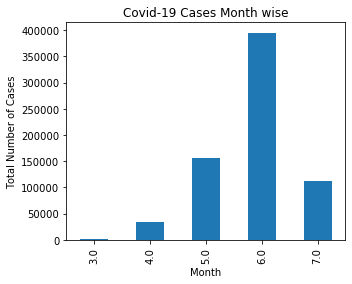

In [304]:
M.plot.bar(figsize=(5,4))
plt.ylabel('Total Number of Cases')
plt.title('Covid-19 Cases Month wise')
plt.show()

# Total Covid-19 Cases State wise

In [306]:
N=data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=True)
N

Detected State
Meghalaya                                       72.0
Andaman and Nicobar Islands                    114.0
Sikkim                                         125.0
Mizoram                                        186.0
Arunachal Pradesh                              269.0
Dadra and Nagar Haveli and Daman and Diu       373.0
Chandigarh                                     466.0
Nagaland                                       578.0
Puducherry                                     946.0
Ladakh                                        1005.0
Himachal Pradesh                              1064.0
Manipur                                       1365.0
Tripura                                       1580.0
Goa                                           1761.0
Jharkhand                                     2807.0
Uttarakhand                                   3123.0
Chhattisgarh                                  3199.0
State Unassigned                              4629.0
Kerala                         

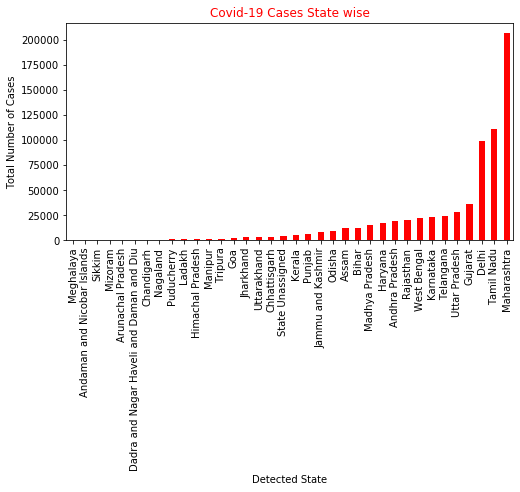

In [307]:
N.plot.bar(figsize=(8,4),color='red')
plt.ylabel('Total Number of Cases')
plt.title('Covid-19 Cases State wise',color='red')
plt.show()

# Total Male/Female Infected with coronavirus

In [346]:
G=data.groupby('Gender')['Num Cases'].sum()
G
arr1= GWB['Num Cases'].values

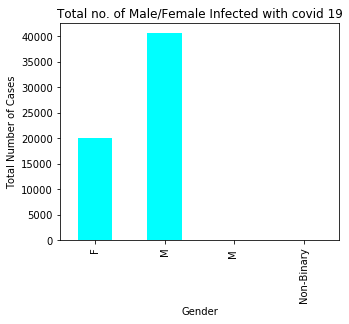

In [347]:
plt.bar(['M','F'], arr1)
G.plot.bar(figsize=(5,4),color='cyan')
plt.ylabel('Total Number of Cases')
plt.title('Total no. of Male/Female Infected with covid 19')
plt.show()

# Total number of Covid Cases age wise i.e, Which Age Group is Infected Most ?

In [313]:
A = data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
A

Age Bracket
30    1912.0
25    1673.0
35    1665.0
40    1607.0
32    1468.0
45    1400.0
28    1376.0
24    1364.0
26    1322.0
27    1268.0
Name: Num Cases, dtype: float64

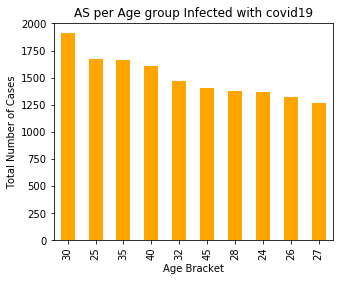

In [318]:
A.plot.bar(figsize=(5,4),color='orange')
plt.ylabel('Total Number of Cases')
plt.title('AS per Age group Infected with covid19')
plt.show()
plt.show()

# Check State wise Total Cases in India

In [320]:
M = data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
M

Detected State
Maharashtra                                 206605.0
Tamil Nadu                                  111144.0
Delhi                                        99440.0
Gujarat                                      36118.0
Uttar Pradesh                                27698.0
Telangana                                    23900.0
Karnataka                                    23401.0
West Bengal                                  22120.0
Rajasthan                                    20160.0
Andhra Pradesh                               18695.0
Haryana                                      16993.0
Madhya Pradesh                               14928.0
Bihar                                        11859.0
Assam                                        11737.0
Odisha                                        9069.0
Jammu and Kashmir                             8428.0
Punjab                                        6281.0
Kerala                                        5369.0
State Unassigned               

# West Bengal Satus in the Month of July i.e Current Month

In [335]:
WB = data[(data['Detected State']=='West Bengal') & (data['Month']==7.0)].groupby('Current Status')['Current Status'].count()
WB

Current Status
Deceased        31
Hospitalized    96
Recovered       94
Name: Current Status, dtype: int64

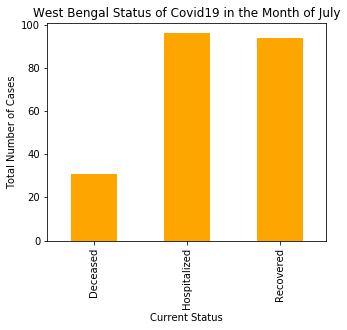

In [336]:
WB.plot.bar(figsize=(5,4),color='orange')
plt.ylabel('Total Number of Cases')
plt.title('West Bengal Status of Covid19 in the Month of July')
plt.show()

In [337]:
print(data)

        Unnamed: 0  Num Cases Date Announced Age Bracket Gender  \
0                0        1.0     30/01/2020          20      F   
1                1        1.0       2/2/2020         NaN    NaN   
2                2        1.0       3/2/2020         NaN    NaN   
3                3        1.0       2/3/2020          45      M   
4                4        1.0       2/3/2020          24      M   
...            ...        ...            ...         ...    ...   
139180       16126        NaN            NaN         NaN    NaN   
139181       16127        NaN            NaN         NaN    NaN   
139182       16128        NaN            NaN         NaN    NaN   
139183       16129        NaN            NaN         NaN    NaN   
139184       16130        NaN            NaN         NaN    NaN   

                   Detected City Detected District Detected State  \
0                       Thrissur          Thrissur         Kerala   
1                      Alappuzha         Alappuzha       

# Total number of cases in West Bengal Till date

In [338]:
WB = data[(data['Detected State']=='West Bengal')].groupby('Current Status')['Current Status'].count()
WB

Current Status
Deceased         264
Hospitalized    1637
Recovered        827
Name: Current Status, dtype: int64

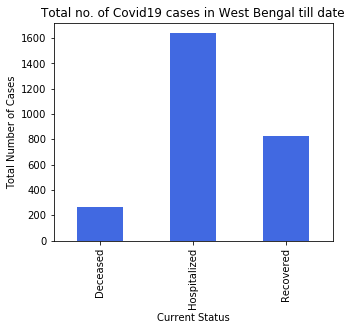

In [339]:
WB.plot.bar(figsize=(5,4),color='royalblue')
plt.ylabel('Total Number of Cases')
plt.title('Total no. of Covid19 cases in West Bengal till date')
plt.show()

# Gender Wise Data of West Bengal

In [340]:
WB = data[(data['Detected State']=='West Bengal')] 


In [341]:
WB.head(1)

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
143,143,1.0,17/03/2020,18,M,Kolkata,Kolkata,West Bengal,Recovered,17.0,3.0,2020.0


In [342]:
GWB=WB.groupby('Gender').count()

GWB.dypes()

In [343]:

GWB.dtypes

Unnamed: 0           int64
Num Cases            int64
Date Announced       int64
Age Bracket          int64
Detected City        int64
Detected District    int64
Detected State       int64
Current Status       int64
Day                  int64
Month                int64
Year                 int64
dtype: object

In [344]:
arr= GWB['Num Cases'].values

Text(0.5, 1.0, 'Confirmed cases of Male and Femalein West Bengal')

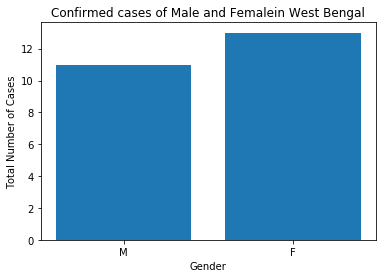

In [348]:
plt.bar(['M','F'], arr)
plt.ylabel('Total Number of Cases')
plt.xlabel('Gender')
plt.title('Confirmed cases of Male and Femalein West Bengal')

In [101]:
df.dtypes

Num Cases            float64
Date Announced        object
Age Bracket           object
Gender                object
Detected City         object
Detected District     object
Detected State        object
Current Status        object
Day                  float64
Month                float64
Year                 float64
dtype: object

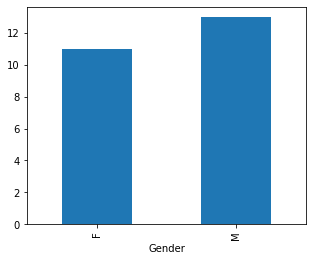

In [81]:
GWB.plot.bar(figsize=(5,4))
plt.show()


# Age wise data of West Bengal  i.e, Which Age Group is Infected Most ?

In [362]:
# WB_Age = df[(df['Detected State']=='West Bengal').group by('Age Bracket')]['Num Cases'].sum().sort_values(ascending=False).head(10)
WB1 = data[(data['Current Status']=='')] & 
Age = WB1.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=True)
Age

Series([], Name: Num Cases, dtype: float64)

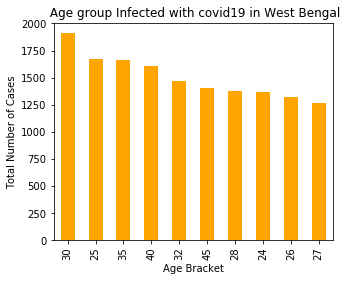

In [363]:
A.plot.bar(figsize=(5,4),color='orange')
plt.ylabel('Total Number of Cases')
plt.title(' Age group Infected with covid19 in West Bengal')
plt.show()
plt.show()

# B. Correlation heatmap for various parameters 

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [250]:
df=pd.read_csv('F:\Sir Python\Day 8\covid.csv')
df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,3/2/2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
3706,3/7/2020,8:00 AM,Tripura,-,-,1146,1,1435
3707,3/7/2020,8:00 AM,Uttarakhand,-,-,2405,42,2984
3708,3/7/2020,8:00 AM,Uttar Pradesh,-,-,17221,735,24825
3709,3/7/2020,8:00 AM,West Bengal,-,-,13037,699,19819


In [251]:
df.columns 

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [252]:
df['Recovery Rate'] = df['Confirmed']/(df['Deaths'])
df['Mortality Rate'] = df['Cured']/(df['Confirmed'])

In [253]:
data = df.iloc[:,1:]
data

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Recovery Rate,Mortality Rate
0,6:00 PM,Kerala,1,0,0,0,1,inf,0.000000
1,6:00 PM,Kerala,1,0,0,0,1,inf,0.000000
2,6:00 PM,Kerala,2,0,0,0,2,inf,0.000000
3,6:00 PM,Kerala,3,0,0,0,3,inf,0.000000
4,6:00 PM,Kerala,3,0,0,0,3,inf,0.000000
...,...,...,...,...,...,...,...,...,...
3706,8:00 AM,Tripura,-,-,1146,1,1435,1435.000000,0.798606
3707,8:00 AM,Uttarakhand,-,-,2405,42,2984,71.047619,0.805965
3708,8:00 AM,Uttar Pradesh,-,-,17221,735,24825,33.775510,0.693696
3709,8:00 AM,West Bengal,-,-,13037,699,19819,28.353362,0.657803


In [254]:
data.head()

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Recovery Rate,Mortality Rate
0,6:00 PM,Kerala,1,0,0,0,1,inf,0.0
1,6:00 PM,Kerala,1,0,0,0,1,inf,0.0
2,6:00 PM,Kerala,2,0,0,0,2,inf,0.0
3,6:00 PM,Kerala,3,0,0,0,3,inf,0.0
4,6:00 PM,Kerala,3,0,0,0,3,inf,0.0


In [255]:
WB = df[(df['State/UnionTerritory']=='West Bengal')]
WB

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Recovery Rate,Mortality Rate
208,18/03/20,6:00 PM,West Bengal,1,0,0,0,1,inf,0.000000
227,19/03/20,6:00 PM,West Bengal,1,0,0,0,1,inf,0.000000
247,20/03/20,6:00 PM,West Bengal,2,0,0,0,2,inf,0.000000
269,21/03/20,6:00 PM,West Bengal,3,0,0,0,3,inf,0.000000
292,22/03/20,6:00 PM,West Bengal,4,0,0,0,4,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
3565,29/06/20,8:00 AM,West Bengal,-,-,11193,639,17283,27.046948,0.647631
3601,30/06/20,8:00 AM,West Bengal,-,-,11719,653,17907,27.422665,0.654437
3637,1/7/2020,8:00 AM,West Bengal,-,-,12130,668,18559,27.782934,0.653591
3673,2/7/2020,8:00 AM,West Bengal,-,-,12528,683,19170,28.067350,0.653521


In [256]:
WB.dtypes

Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational      object
ConfirmedForeignNational     object
Cured                         int64
Deaths                        int64
Confirmed                     int64
Recovery Rate               float64
Mortality Rate              float64
dtype: object

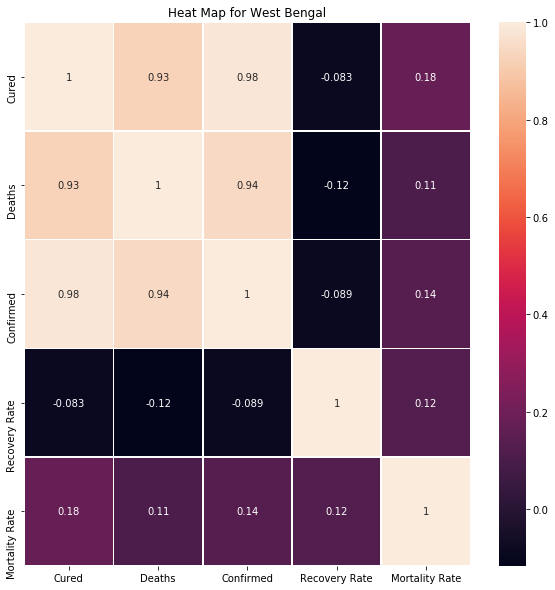

In [257]:
plt.figure(figsize=(10,10))
plt.title("Heat Map for West Bengal")
sns.heatmap(df.corr() ,annot= True,linewidth=0.7)

# C.Build a Model to predicting the confirmed and recovered on any dates past 15th July 2020

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

In [91]:
data=pd.read_csv('F:\Sir Python\Day 3\Minor Project/Covid19India.csv')
data

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,2/2/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,3/2/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,2/3/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,2/3/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
139180,16126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139181,16127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139182,16128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139183,16129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
day

Month  Day 
3.0    4.0         5.0
       5.0         1.0
       7.0         2.0
       9.0         4.0
       10.0        4.0
                ...   
7.0    1.0     19429.0
       2.0     21947.0
       3.0     22718.0
       4.0     24018.0
       5.0     23932.0
Name: Num Cases, Length: 122, dtype: float64

In [40]:
x=np.arange(len(day))
x=x.reshape(-1,1)
    


In [157]:
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [88]:
y=day.values

In [89]:
y

array([5.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00,
       8.0000e+00, 4.0000e+00, 6.0000e+00, 1.1000e+01, 8.0000e+00,
       1.2000e+01, 1.4000e+01, 2.2000e+01, 2.1000e+01, 5.2000e+01,
       6.7000e+01, 5.9000e+01, 8.2000e+01, 6.3000e+01, 7.5000e+01,
       5.8000e+01, 1.4000e+02, 1.2300e+02, 1.0600e+02, 1.7800e+02,
       3.0600e+02, 4.2300e+02, 4.8500e+02, 5.5600e+02, 5.7600e+02,
       6.0600e+02, 4.8500e+02, 5.7000e+02, 5.6300e+02, 8.1200e+02,
       8.7000e+02, 8.5300e+02, 7.5800e+02, 1.2430e+03, 1.0310e+03,
       8.8400e+02, 1.0610e+03, 9.2200e+02, 1.3700e+03, 1.5790e+03,
       1.2390e+03, 1.5370e+03, 1.2920e+03, 1.6670e+03, 1.4070e+03,
       1.8350e+03, 1.6070e+03, 1.5680e+03, 1.9020e+03, 1.7050e+03,
       1.8020e+03, 2.3960e+03, 2.5640e+03, 2.9520e+03, 3.6560e+03,
       2.9710e+03, 3.6020e+03, 3.3440e+03, 3.3390e+03, 3.1750e+03,
       4.3110e+03, 3.5920e+03, 3.5620e+03, 3.7260e+03, 3.9910e+03,
       3.8080e+03, 4.7940e+03, 5.0490e+03, 4.6280e+03, 6.1540e

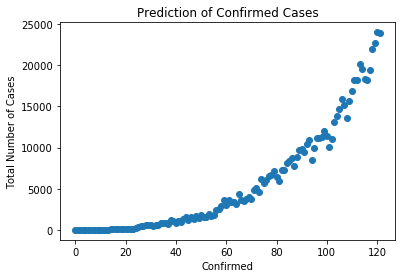

In [183]:
plt.scatter(x,y)
plt.ylabel('Total Number of Cases')
plt.title('Prediction of Confirmed Cases')
plt.xlabel('Confirmed')
plt.show()


In [151]:
# x=x.reshape(-1,1)

In [135]:
from sklearn.linear_model import LinearRegression
# LinearRegression()

In [161]:

print(x.shape)

print(y.shape)

(122, 1)
(122,)


In [171]:
x_train=x[:100]
x_test=x[100:]
y_train=y[:100]
y_test=y[100:]
regressor=LinearRegression().fit(x_train,y_train)
# y[122]


In [165]:
x_pred=np.array([122])
print(x_pred.shape)
x_pred=x_pred.reshape(-1,1)
print(x_pred.shape)

(1,)
(1, 1)


In [175]:
y_pred=regressor.predict(x_test)

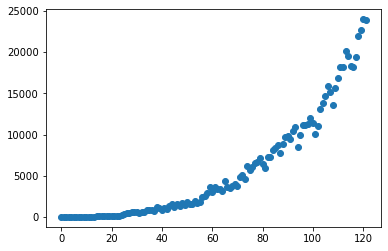

In [160]:
plt.scatter(x,y)


In [167]:
regressor.intercept_

-4341.913634546184

In [168]:
regressor.coef_

array([166.28119])

In [177]:
from sklearn.metrics import r2_score
rsq =r2_score(y_test, y_pred)
print(rsq)

-2.8318629441444925


# Polynomial Regression

In [279]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as  plt

In [280]:
data=pd.read_csv('F:\Sir Python\Day 3\Minor Project/Covid19India.csv')
data

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,2/2/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,3/2/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,2/3/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,2/3/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
139180,16126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139181,16127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139182,16128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139183,16129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
day

Month  Day 
3.0    4.0         5.0
       5.0         1.0
       7.0         2.0
       9.0         4.0
       10.0        4.0
                ...   
7.0    1.0     19429.0
       2.0     21947.0
       3.0     22718.0
       4.0     24018.0
       5.0     23932.0
Name: Num Cases, Length: 122, dtype: float64

In [282]:
x=np.arange(len(day))
#x=x.reshape(-1,1)
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121])

In [283]:
y=day.values

In [284]:
 y

array([5.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00,
       8.0000e+00, 4.0000e+00, 6.0000e+00, 1.1000e+01, 8.0000e+00,
       1.2000e+01, 1.4000e+01, 2.2000e+01, 2.1000e+01, 5.2000e+01,
       6.7000e+01, 5.9000e+01, 8.2000e+01, 6.3000e+01, 7.5000e+01,
       5.8000e+01, 1.4000e+02, 1.2300e+02, 1.0600e+02, 1.7800e+02,
       3.0600e+02, 4.2300e+02, 4.8500e+02, 5.5600e+02, 5.7600e+02,
       6.0600e+02, 4.8500e+02, 5.7000e+02, 5.6300e+02, 8.1200e+02,
       8.7000e+02, 8.5300e+02, 7.5800e+02, 1.2430e+03, 1.0310e+03,
       8.8400e+02, 1.0610e+03, 9.2200e+02, 1.3700e+03, 1.5790e+03,
       1.2390e+03, 1.5370e+03, 1.2920e+03, 1.6670e+03, 1.4070e+03,
       1.8350e+03, 1.6070e+03, 1.5680e+03, 1.9020e+03, 1.7050e+03,
       1.8020e+03, 2.3960e+03, 2.5640e+03, 2.9520e+03, 3.6560e+03,
       2.9710e+03, 3.6020e+03, 3.3440e+03, 3.3390e+03, 3.1750e+03,
       4.3110e+03, 3.5920e+03, 3.5620e+03, 3.7260e+03, 3.9910e+03,
       3.8080e+03, 4.7940e+03, 5.0490e+03, 4.6280e+03, 6.1540e

In [285]:
from sklearn.preprocessing import PolynomialFeatures

In [286]:
print(x.shape)


(122,)


In [287]:
print(y.shape)

(122,)


In [288]:
poly=PolynomialFeatures(degree=2)
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [289]:
X=poly.fit_transform(x.reshape(-1,1))
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00],
       [1.0000e+00, 4.0000e+00, 1.6000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01],
       [1.0000e+00, 6.0000e+00, 3.6000e+01],
       [1.0000e+00, 7.0000e+00, 4.9000e+01],
       [1.0000e+00, 8.0000e+00, 6.4000e+01],
       [1.0000e+00, 9.0000e+00, 8.1000e+01],
       [1.0000e+00, 1.0000e+01, 1.0000e+02],
       [1.0000e+00, 1.1000e+01, 1.2100e+02],
       [1.0000e+00, 1.2000e+01, 1.4400e+02],
       [1.0000e+00, 1.3000e+01, 1.6900e+02],
       [1.0000e+00, 1.4000e+01, 1.9600e+02],
       [1.0000e+00, 1.5000e+01, 2.2500e+02],
       [1.0000e+00, 1.6000e+01, 2.5600e+02],
       [1.0000e+00, 1.7000e+01, 2.8900e+02],
       [1.0000e+00, 1.8000e+01, 3.2400e+02],
       [1.0000e+00, 1.9000e+01, 3.6100e+02],
       [1.0000e+00, 2.0000e+01, 4.0000e+02],
       [1.0000e+00, 2.1000e+01, 4.4100e+02],
       [1.

In [290]:
print(X.shape)

(122, 3)


In [291]:
pd.DataFrame(X)


,0,1,2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
...,...,...,...
117,1.0,117.0,13689.0
118,1.0,118.0,13924.0
119,1.0,119.0,14161.0
120,1.0,120.0,14400.0


In [352]:
 X=X.reshape(-1,1)
X

array([[1.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [1.0000e+00],
       [1.0000e+00],
       [1.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [4.0000e+00],
       [1.0000e+00],
       [3.0000e+00],
       [9.0000e+00],
       [1.0000e+00],
       [4.0000e+00],
       [1.6000e+01],
       [1.0000e+00],
       [5.0000e+00],
       [2.5000e+01],
       [1.0000e+00],
       [6.0000e+00],
       [3.6000e+01],
       [1.0000e+00],
       [7.0000e+00],
       [4.9000e+01],
       [1.0000e+00],
       [8.0000e+00],
       [6.4000e+01],
       [1.0000e+00],
       [9.0000e+00],
       [8.1000e+01],
       [1.0000e+00],
       [1.0000e+01],
       [1.0000e+02],
       [1.0000e+00],
       [1.1000e+01],
       [1.2100e+02],
       [1.0000e+00],
       [1.2000e+01],
       [1.4400e+02],
       [1.0000e+00],
       [1.3000e+01],
       [1.6900e+02],
       [1.0000e+00],
       [1.4000e+01],
       [1.9600e+02],
       [1.0000e+00],
       [1.5000e+01],
       [2.250

In [353]:
print(X.shape)

(366, 1)


In [354]:
from sklearn.linear_model import LinearRegression

In [355]:
reg = LinearRegression()


In [356]:
reg.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [162]:
reg.intercept_
reg.coef_

array([166.28119])

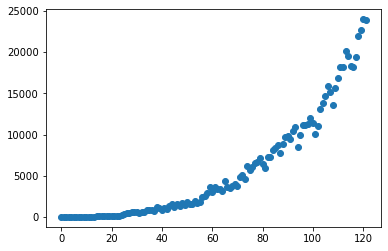

In [163]:
plt.scatter(x,y)
plt.show()

In [164]:
reg.predict(X)

array([-4.17563244e+03, -4.34191363e+03, -4.34191363e+03, -4.17563244e+03,
       -4.17563244e+03, -4.17563244e+03, -4.17563244e+03, -4.00935125e+03,
       -3.67678887e+03, -4.17563244e+03, -3.84307006e+03, -2.84538292e+03,
       -4.17563244e+03, -3.67678887e+03, -1.68141459e+03, -4.17563244e+03,
       -3.51050768e+03, -1.84883884e+02, -4.17563244e+03, -3.34422649e+03,
        1.64420921e+03, -4.17563244e+03, -3.17794530e+03,  3.80586468e+03,
       -4.17563244e+03, -3.01166411e+03,  6.30008253e+03, -4.17563244e+03,
       -2.84538292e+03,  9.12686276e+03, -4.17563244e+03, -2.67910173e+03,
        1.22862054e+04, -4.17563244e+03, -2.51282054e+03,  1.57781104e+04,
       -4.17563244e+03, -2.34653935e+03,  1.96025777e+04, -4.17563244e+03,
       -2.18025816e+03,  2.37596075e+04, -4.17563244e+03, -2.01397697e+03,
        2.82491996e+04, -4.17563244e+03, -1.84769578e+03,  3.30713541e+04,
       -4.17563244e+03, -1.68141459e+03,  3.82260710e+04, -4.17563244e+03,
       -1.51513340e+03,  

In [168]:
yp=reg.predict(X)
yp


array([-4.17563244e+03, -4.34191363e+03, -4.34191363e+03, -4.17563244e+03,
       -4.17563244e+03, -4.17563244e+03, -4.17563244e+03, -4.00935125e+03,
       -3.67678887e+03, -4.17563244e+03, -3.84307006e+03, -2.84538292e+03,
       -4.17563244e+03, -3.67678887e+03, -1.68141459e+03, -4.17563244e+03,
       -3.51050768e+03, -1.84883884e+02, -4.17563244e+03, -3.34422649e+03,
        1.64420921e+03, -4.17563244e+03, -3.17794530e+03,  3.80586468e+03,
       -4.17563244e+03, -3.01166411e+03,  6.30008253e+03, -4.17563244e+03,
       -2.84538292e+03,  9.12686276e+03, -4.17563244e+03, -2.67910173e+03,
        1.22862054e+04, -4.17563244e+03, -2.51282054e+03,  1.57781104e+04,
       -4.17563244e+03, -2.34653935e+03,  1.96025777e+04, -4.17563244e+03,
       -2.18025816e+03,  2.37596075e+04, -4.17563244e+03, -2.01397697e+03,
        2.82491996e+04, -4.17563244e+03, -1.84769578e+03,  3.30713541e+04,
       -4.17563244e+03, -1.68141459e+03,  3.82260710e+04, -4.17563244e+03,
       -1.51513340e+03,  

In [166]:
#yp=yp.reshape(-1,-1)

In [169]:
print(yp.shape)

(366,)


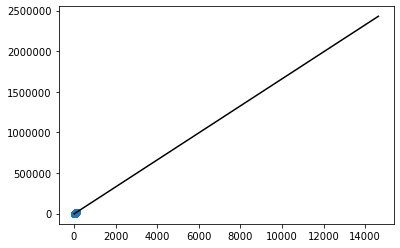

In [183]:
plt.scatter(x,y)
plt.plot(X,yp,color='k')
plt.show()

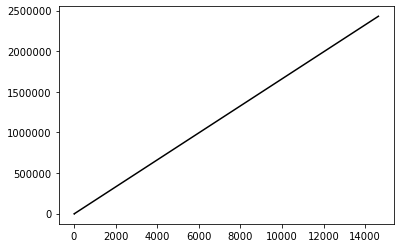

In [173]:
reg.score(x,y)*100

82.70292145166775

In [225]:
reg.predict(poly.transform([(122)]))

ValueError: Expected 2D array, got 1D array instead:
array=[122.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# D. Build a classifier for severity gauging

In [1]:
import pandas as pd 
import numpy as np

In [3]:
dataset=pd.read_csv('PAML_COVID_Dataset.csv')

In [4]:
dataset

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,67,loss of speech or movement,aches and pains,tiredness,Moderate,flu
1,31/01/20,6:00 PM,Kerala,1,Male,0,69,loss of speech or movement,sore throat,fever,Moderate,flu
2,1/2/2020,6:00 PM,Kerala,2,Female,0,27,loss of speech or movement,aches and pains,dry cough,Mild,flu
3,2/2/2020,6:00 PM,Kerala,3,Female,0,81,difficulty breathing or shortness of breath,aches and pains,tiredness,Seviour,Covid
4,3/2/2020,6:00 PM,Kerala,3,Male,0,6,chest pain or pressure,conjunctivitis,tiredness,Mild,flu
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,17/06/20,8:00 AM,Tripura,-,Female,-,19,difficulty breathing or shortness of breath,"a rash on skin, or discolouration of fingers o...",tiredness,Seviour,flu
3131,17/06/20,8:00 AM,Uttarakhand,-,Male,-,29,chest pain or pressure,sore throat,tiredness,Mild,Covid
3132,17/06/20,8:00 AM,Uttar Pradesh,-,Female,-,11,difficulty breathing or shortness of breath,aches and pains,tiredness,Mild,Covid
3133,17/06/20,8:00 AM,West Bengal,-,Female,-,26,loss of speech or movement,diarrhoea,dry cough,Seviour,flu


In [5]:
dataset=dataset.drop(['Date'], axis=1)
dataset=dataset.drop(['Time'], axis=1)

In [6]:
dataset

,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,Kerala,1,Male,0,67,loss of speech or movement,aches and pains,tiredness,Moderate,flu
1,Kerala,1,Male,0,69,loss of speech or movement,sore throat,fever,Moderate,flu
2,Kerala,2,Female,0,27,loss of speech or movement,aches and pains,dry cough,Mild,flu
3,Kerala,3,Female,0,81,difficulty breathing or shortness of breath,aches and pains,tiredness,Seviour,Covid
4,Kerala,3,Male,0,6,chest pain or pressure,conjunctivitis,tiredness,Mild,flu
...,...,...,...,...,...,...,...,...,...,...
3130,Tripura,-,Female,-,19,difficulty breathing or shortness of breath,"a rash on skin, or discolouration of fingers o...",tiredness,Seviour,flu
3131,Uttarakhand,-,Male,-,29,chest pain or pressure,sore throat,tiredness,Mild,Covid
3132,Uttar Pradesh,-,Female,-,11,difficulty breathing or shortness of breath,aches and pains,tiredness,Mild,Covid
3133,West Bengal,-,Female,-,26,loss of speech or movement,diarrhoea,dry cough,Seviour,flu


In [7]:
from sklearn.preprocessing import LabelEncoder
dataset=dataset.apply(LabelEncoder().fit_transform)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 10 columns):
State/UnionTerritory        3135 non-null int32
ConfirmedIndianNational     3135 non-null int32
Gender                      3135 non-null int32
ConfirmedForeignNational    3135 non-null int32
Age                         3135 non-null int32
Serious symptoms            3135 non-null int32
Less common symptoms        3135 non-null int32
Most common symptoms        3135 non-null int32
Severity                    3135 non-null int32
Patient_Status              3135 non-null int32
dtypes: int32(10)
memory usage: 122.5 KB


In [13]:
y=dataset['Severity']



In [15]:
X=dataset.drop(['Patient_Status '],axis=1)

In [16]:
X

,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity
0,19,2,1,1,62,2,1,2,1
1,19,2,1,1,64,2,6,1,1
2,19,21,0,1,22,2,1,0,0
3,19,31,0,1,76,1,1,2,2
4,19,31,1,1,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...
3130,35,0,0,0,14,1,0,2,2
3131,38,0,1,0,24,0,6,2,0
3132,37,0,0,0,6,1,1,2,0
3133,39,0,0,0,21,2,3,0,2


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
yhat = knn.predict(X_test)

In [21]:
yhat

array([1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2,
       2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1,
       0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2,
       2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1,

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.4953596639784895